In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [80]:
#def softmax(h):
#    return np.exp(h) / (np.sum(np.exp(h), axis = 1, keepdims =True))

def sigmoid(H):
    return 1/(1 + np.exp(-H))

def OLS(y,y_hat):
    return np.sum((y-y_hat)**2)

def R2 (y, y_hat):
    return 1 - OLS(y, y_hat) / OLS(y,y.mean())

#def cross_entropy(y, p):
#    return  -np.sum(y*np.log(p))

def accuracy(y, p):
    return np.mean(y == P.argmax(axis = 1))

def ReLU(h):
    #return np.maximum(h, 0)
    return h*(h>0)
    
def D_ReLU(h):
    #return np.maximum(h, 0)/h
    return (h>0)

#def Leaky_ReLU(h,c):
#    return h*(h>0) + c*h*(h<0)
    
#def D_Leaky_ReLU(h,c):
#     return h*(h>0) + c*(h<0)

def feed_forward(X,W1,b1,W2,b2,W3,b3,W4,b4,W5,b5,W6,b6):
    Z1 = ReLU(np.matmul(X,W1)+b1)
    Z2 = ReLU(np.matmul(Z1,W2) + b2)
    Z3 = ReLU(np.matmul(Z2,W3) + b3)
    Z4 = ReLU(np.matmul(Z3,W4) + b4)
    Z5 = ReLU(np.matmul(Z4,W5) + b5)
    #changed to regression 
    y_hat = np.matmul(Z5,W6)+ b6
    return Z1 ,Z2 ,Z3 ,Z4 , Z5, y_hat

In [89]:
def layer5 (X,Y,N,eta,epochs):
    M1 = N
    M2 = N
    M3 = N
    M4 = N
    M5 = N

    W1 = np.random.randn(X.shape[1],M1)
    b1 = np.random.randn(M1)
    W2 = np.random.randn(M1,M2)
    b2 = np.random.randn(M2)
    W3 = np.random.randn(M2,M3)
    b3 = np.random.randn(M3)
    W4 = np.random.randn(M3,M4)
    b4 = np.random.randn(M4)
    W5 = np.random.randn(M4,M5)
    b5 = np.random.randn(M5)
    
    W6= np.random.randn(M5,Y.shape[1])
    b6 = np.random.randn(Y.shape[1])

    J = []

    #eta = 1e-8

    #epochs= int(1e6)

    for epoch in range (epochs):
    
    #update feed_forward for regression
        Z1,Z2,Z3,Z4,Z5,Y_hat = feed_forward(X,W1,b1,W2,b2,W3,b3,W4,b4,W5,b5,W6,b6)
    
    #classication
        J.append(OLS(Y,Y_hat))
    
        dH6 = Y_hat - Y
        dW6 = np.matmul(Z5.T,dH6)
        W6 -= eta*dW6
        b6 -= eta*dH6.sum(axis=0)
        
        dZ5 = np.matmul(dH6,W6.T)
    #using ReLu
        dH5 = dZ5*D_ReLU(Z5)
        dW5 = np.matmul(Z4.T,dH5)
        W5 -= eta*dW5
        b5 -= eta*dH5.sum(axis=0)
    
        dZ4 = np.matmul(dH5,W5.T)
    #using ReLu
        dH4 = dZ4*D_ReLU(Z4)
        dW4 = np.matmul(Z3.T,dH4)
        W4 -= eta*dW4
        b4 -= eta*dH4.sum(axis=0)
    
        dZ3 = np.matmul(dH4,W4.T)
    #using ReLu
        dH3 = dZ3*D_ReLU(Z3)
        dW3 = np.matmul(Z2.T,dH3)
        W3 -= eta*dW3
        b3 -= eta*dH3.sum(axis=0)
    
        dZ2 = np.matmul(dH3,W3.T)
    #using ReLu
        dH2 = dZ2*D_ReLU(Z2)
        dW2 = np.matmul(Z1.T,dH2)
        W2 -= eta*dW2
        b2 -= eta*dH2.sum(axis=0)
    
        dZ1 = np.matmul(dH2,W2.T)
    #using ReLu
        dH1 = dZ1*D_ReLU(Z1)
        dW1 = np.matmul(X.T,dH1)
        W1 -= eta*dW1
        b1 -= eta*dH1.sum(axis=0)
    
    return J,Y_hat
    


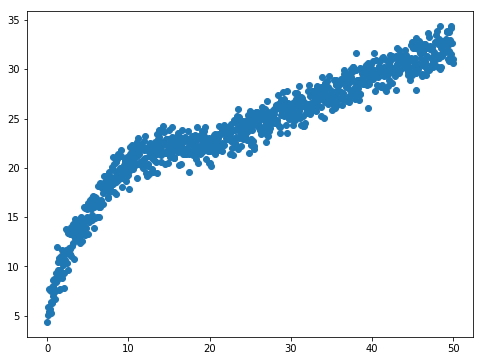

In [90]:
N = 1000

x = np.linspace(0,50,N)

y = 3.1415926 + 4.1415926*np.sqrt(x)+ 4.1472832*np.exp(-0.01431*(x-10)**2)+ np.random.randn(N)

plt.figure(figsize = (8,6))
plt.scatter(x,y)

In [91]:
X = x.reshape(N,1)
Y = y.reshape(N,1)

In [92]:
J,Y_hat = layer5 (X,Y,6,(1e-8),int(1e6))

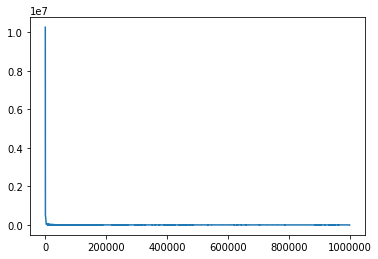

In [93]:
plt.plot(J)

In [94]:
print("R2 is : {}".format(R2(Y,Y_hat)))

R2 is : 0.9629177473373042


R2 is : 0.9724244641236874

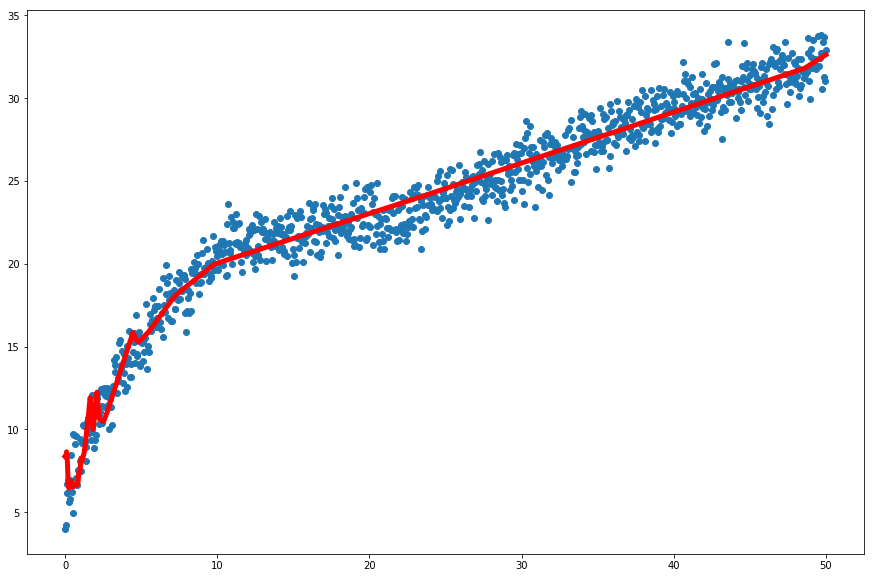

In [65]:
plt.figure(figsize = (15,10))
plt.scatter(x,y)
plt.plot(x, Y_hat, color = "red", linewidth=5)

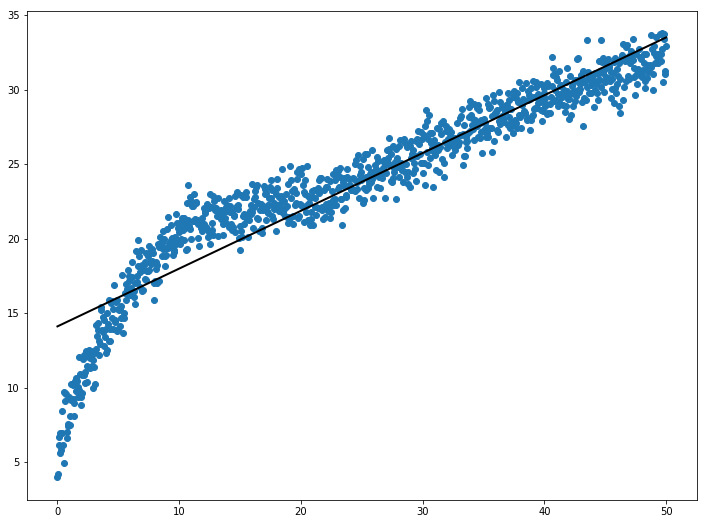

In [46]:
d = np.mean(x**2) - np.mean(x)**2

w0 = (np.mean(y)*np.mean(x**2) - np.mean(x)*np.mean(x*y)) / d
w1 = (np.mean(x*y) - np.mean(x)*np.mean(y)) / d

y_hat = w0 + w1*x

plt.figure(figsize = (12,9))
plt.scatter(x, y)
plt.plot(x, y_hat, color = "black", linewidth = 2)

In [47]:
print("R2 is : {}".format(R2(y,y_hat)))

R2 is : 0.8862228579984811
